<h1 align="center">Natural Language Processing</h1>

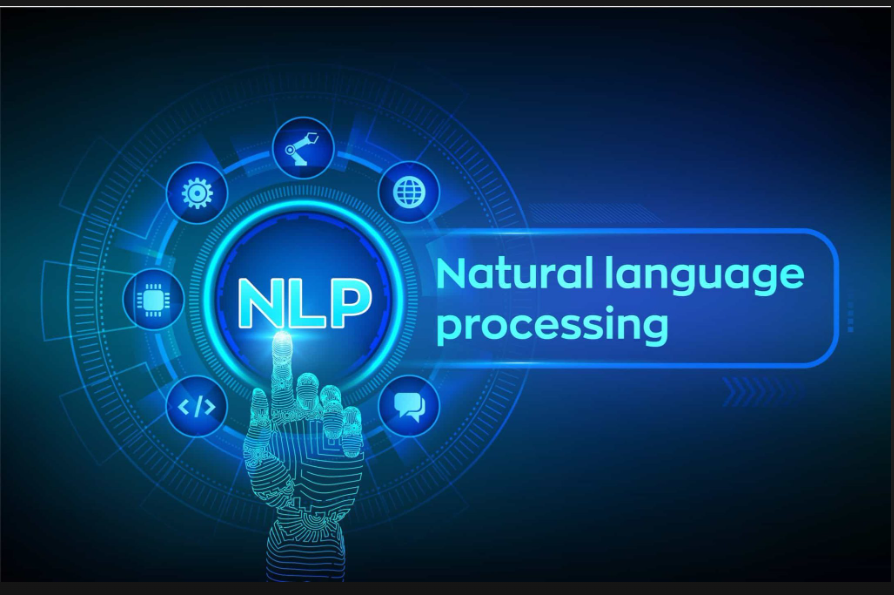

In [440]:
from IPython.display import Image

# Load and display the image with a specific size
Image(filename="2.png", width=1100, height=800)  # Adjust the width and height as needed

In [386]:
doc=nlp('''"Tokenization in NLP
Tokenization is one of the foundational steps in Natural Language Processing (NLP). It involves breaking down a piece of text into smaller units called tokens. These tokens can be words, subwords, or even characters. For example, the sentence "Spacy is great!" would be tokenized into ["Spacy", "is", "great", "!"]. This process is crucial because most NLP tasks—like Part-of-Speech tagging, Named Entity Recognition (NER), and Dependency Parsing—require text to be tokenized before they can be effectively performed.

NLP Pipelines
An NLP pipeline is a sequence of processes that are applied to the text data in order to extract meaningful information. Typically, an NLP pipeline includes the following components:

Tokenization: Splitting the text into tokens.
Lemmatization: Reducing words to their base form.
Part-of-Speech Tagging: Assigning grammatical categories to each token.
Named Entity Recognition (NER): Identifying entities like persons, organizations, and locations.
Dependency Parsing: Analyzing the grammatical structure and relationships between words.
These components work together to transform raw text into structured data that can be used for further analysis or tasks.

Visualizing the Pipeline
To visualize the process sequence of an NLP pipeline, you can refer to the following image:
''')
options = {
    "ents": ["ORG", "GPE", "MONEY"],  # Only highlight ORG, GPE, MONEY
    "colors": {
        "ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
        "GPE": "linear-gradient(90deg, #fba, #fa9)",
        "MONEY": "linear-gradient(90deg, #ffd700, #ff6347)"
    },
    "spans": {
        "fontsize": "100px", # Increase font size
    }
}

# Render the document with increased text size
displacy.render(doc, style="ent", options=options)

In [165]:
import spacy

In [3]:
nlp = spacy.blank("en")

doc = nlp("Dr. Strange loves pav bhaji of mumbai as it costs only 2$ per plate.")

for token in doc:
    print(token)

Dr.
Strange
loves
pav
bhaji
of
mumbai
as
it
costs
only
2
$
per
plate
.


In [5]:
nlp.pipe_names


[]

In [7]:
type(nlp)


spacy.lang.en.English

# Using index to grab tokens

In [11]:
doc[0]

Dr.

In [13]:
token = doc[1]
token.text

'Strange'

In [15]:
type(token)


spacy.tokens.token.Token

# Span object

In [17]:
span = doc[0:5]
span

Dr. Strange loves pav bhaji

# Token attributes

In [19]:
doc = nlp("Tony gave two $ to Peter.")


In [21]:
token0 = doc[0]
token0

Tony

token0.is_alpha


In [25]:
token0.like_num


False

In [27]:
token2 = doc[2]
token2

two

In [29]:
for token in doc:
    print(token, "==>", "index: ", token.i, "is_alpha:", token.is_alpha, 
          "is_punct:", token.is_punct, 
          "like_num:", token.like_num,
          "is_currency:", token.is_currency,
         )

Tony ==> index:  0 is_alpha: True is_punct: False like_num: False is_currency: False
gave ==> index:  1 is_alpha: True is_punct: False like_num: False is_currency: False
two ==> index:  2 is_alpha: True is_punct: False like_num: True is_currency: False
$ ==> index:  3 is_alpha: False is_punct: False like_num: False is_currency: True
to ==> index:  4 is_alpha: True is_punct: False like_num: False is_currency: False
Peter ==> index:  5 is_alpha: True is_punct: False like_num: False is_currency: False
. ==> index:  6 is_alpha: False is_punct: True like_num: False is_currency: False


# Collecting email ids of students from students information sheet

In [173]:
with open("students.txt") as f:
    text = f.readlines()
text

['Dayton high school, 8th grade students information\n',
 '==================================================\n',
 '\n',
 'Name\tbirth day   \temail\n',
 '-----\t------------\t------\n',
 'Virat   5 June, 1882    virat@kohli.com\n',
 'Maria\t12 April, 2001  maria@sharapova.com\n',
 'Serena  24 June, 1998   serena@williams.com \n',
 'Joe      1 May, 1997    joe@root.com\n',
 '\n',
 '\n',
 '\n']

In [35]:
text = " ".join(text)
text

'Dayton high school, 8th grade students information\n ==================================================\n \n Name\tbirth day   \temail\n -----\t------------\t------\n Virat   5 June, 1882    virat@kohli.com\n Maria\t12 April, 2001  maria@sharapova.com\n Serena  24 June, 1998   serena@williams.com \n Joe      1 May, 1997    joe@root.com\n \n \n \n'

In [37]:
doc = nlp(text)
emails = []
for token in doc:
    if token.like_email:
        emails.append(token.text)
emails        

['virat@kohli.com',
 'maria@sharapova.com',
 'serena@williams.com',
 'joe@root.com']

# Customizing tokenizer

In [39]:
from spacy.symbols import ORTH

nlp = spacy.blank("en")
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

['gimme', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

In [42]:
nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"},
])
doc = nlp("gimme double cheese extra large healthy pizza")
tokens = [token.text for token in doc]
tokens

['gim', 'me', 'double', 'cheese', 'extra', 'large', 'healthy', 'pizza']

 # Sentence Tokenization or Segmentation

In [45]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

In [47]:
nlp.pipeline


[]

In [49]:
nlp.add_pipe('sentencizer')


In [53]:
doc = nlp("Dr. Strange loves pav bhaji of mumbai. Hulk loves chat of delhi")
for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaji of mumbai.
Hulk loves chat of delhi


<h1 align="center">Exercise</h1>

In [156]:
test='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

# TODO: Write code here
# Hint: token has an attribute that can be used to detect a url

In [182]:
import spacy
nlp.pipeline
nlp.add_pipe('sentencizer')
# Load the spacy language model
nlp = spacy.blank("en")

# Process the text using the spacy model
doc = nlp(test)

# Initialize an empty list to store URLs
url = []

# Iterate over each token in the processed document
for token in doc:
    if token.like_url:
        url.append(token.text)

# Output the extracted URLs
print(url)


['http://www.data.gov/', 'http://www.science', 'http://data.gov.uk/.', 'http://www3.norc.org/gss+website/', 'http://www.europeansocialsurvey.org/.']


In [140]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

# TODO: Write code here
# Hint: Use token.i for the index of a token and token.is_currency for currency symbol detection

In [192]:
doc = nlp(transactions)

# Initialize an empty list to store the amounts with symbols
amounts_with_symbols = []

# Iterate over each token in the processed document
for token in doc:
    if token.is_currency:
        # Get the previous token (which should be the amount) using token.i
        amount = doc[token.i - 1]
        amounts_with_symbols.append(f"{amount.text} {token.text}")

# Output the amounts with currency symbols
print(amounts_with_symbols)

['two $', '500 €']


<h1 align="center">What is a Pipeline in NLP?</h1>

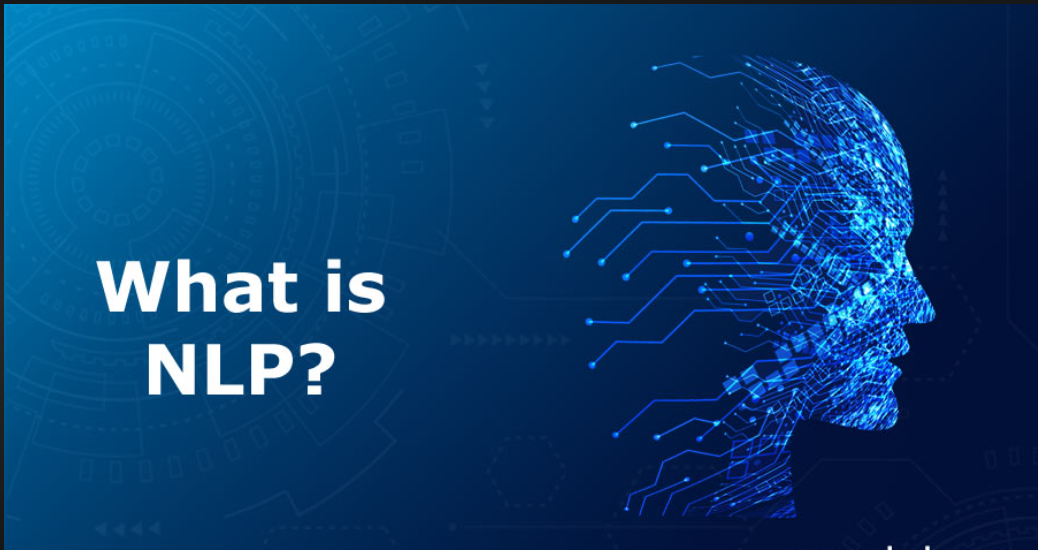

In [421]:
from IPython.display import Image

# Load and display the image with a specific size
Image(filename="1.png", width=1100, height=800)  # Adjust the width and height as needed


# 1- Tokenization: Splits the text into tokens.

In [200]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Pipeline steps applied to the text
for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


# 2 -Lemmatization: Reduces words to their base form.

In [198]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Pipeline steps applied to the text
for token in doc:
    print(token.lemma_)
  

Apple
be
look
at
buy
U.K.
startup
for
$
1
billion


# 3- POS Tagging: Assigns part-of-speech tags.

In [202]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Pipeline steps applied to the text
for token in doc:
    print(token.pos_)
   

PROPN
AUX
VERB
ADP
VERB
PROPN
NOUN
ADP
SYM
NUM
NUM


# 4- Dependency Parsing: Analyzes grammatical structure.

In [204]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Pipeline steps applied to the text
for token in doc:
    print(token.dep_)

nsubj
aux
ROOT
prep
pcomp
dobj
dep
prep
quantmod
compound
pobj


#  5- NER: Identifies named entities.

In [221]:
import spacy

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp('''"Apple Inc. has announced its plan to acquire a U.K. tech startup for $1 billion. 
This acquisition is part of Apple's strategy to expand its presence in the European market. 
The U.K. government has welcomed the investment, citing potential economic benefits. 
Apple's CEO emphasized that this move aligns with the company's long-term goals. 
The $1 billion deal is expected to close by the end of the fiscal year."''')
 
for ent in doc.ents:
    print(ent.text, ent.label_)


Apple Inc. ORG
U.K. GPE
$1 billion MONEY
Apple ORG
European NORP
U.K. GPE
Apple ORG
$1 billion MONEY
the end of the fiscal year DATE


# Displacy Library

In [224]:
from spacy import displacy

In [247]:
doc=nlp('''"Apple Inc. has announced its plan to acquire a U.K. tech startup for $1 billion. 
This acquisition is part of Apple's strategy to expand its presence in the European market. 
The U.K. government has welcomed the investment, citing potential economic benefits. 
Apple's CEO emphasized that this move aligns with the company's long-term goals. 
The $1 billion deal is expected to close by the end of the fiscal year.
''')
options = {
    "ents": ["ORG", "GPE", "MONEY"],  # Only highlight ORG, GPE, MONEY
    "colors": {
        "ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
        "GPE": "linear-gradient(90deg, #fba, #fa9)",
        "MONEY": "linear-gradient(90deg, #ffd700, #ff6347)"
    },
    "spans": {
        "fontsize": "100px", # Increase font size
        "text-size":"500px"
    }
}

# Render the document with increased text size
displacy.render(doc, style="ent", options=options)

# To Spacy.blank for loading Piplelines components we need to passs conpmonents parameter

In [359]:
import spacy

In [361]:
nlp=spacy.blank("en")
doc=nlp("Testla Income is $5 Millons per Year and they make products techonlogyy based")

In [362]:
for token in doc:
    print(token.lemma_,token.pos_,token.dep_)

In [365]:
source_pipe_comp=spacy.load("en_core_web_sm")

In [366]:
nlp.add_pipe("ner",source=source_pipe_comp)

In [367]:
doc=nlp('''"It does not work on simply Spacy.Black("en) beacuse it has not Pipleline components to make it with components we need to pass parameter er_core_web_sm
''')
options = {
    "ents": ["ORG", "GPE", "MONEY"],  # Only highlight ORG, GPE, MONEY
    "colors": {
        "ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
        "GPE": "linear-gradient(90deg, #fba, #fa9)",
        "MONEY": "linear-gradient(90deg, #ffd700, #ff6347)"
    },
    "spans": {
        "fontsize": "100px", # Increase font size
        "text-size":"500px"
    }
}

# Render the document with increased text size
displacy.render(doc, style="ent", options=options)

In [371]:
nlp.pipe_names

['ner']

In [375]:
doc=nlp("Testla Income is $5 Millons per Year and they make products techonlogyy based")
for ent in doc.ents:
    print(ent.text,ent.label_)

Testla Income ORG
$5 Millons MONEY


# Components of pipeline

In [378]:
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

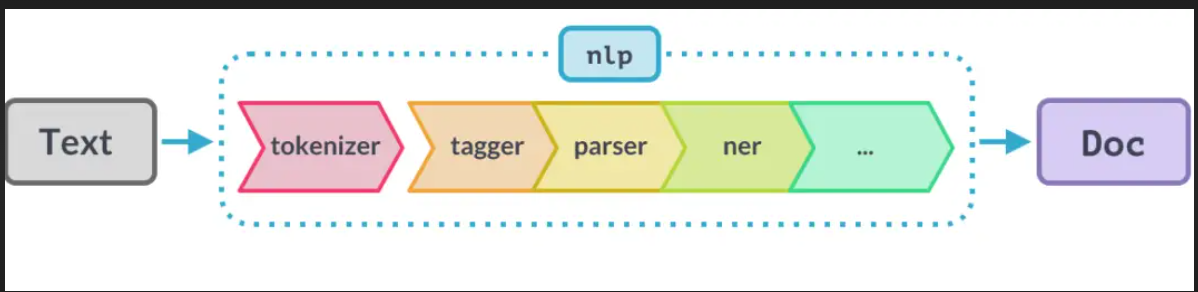

In [435]:
from IPython.display import Image

# Load and display the image
Image(filename="NLP Pipline Components.png",height=1500,width=1200)